## Calculate Yield Strength Programmatically

In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [5]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is BAAF-18B5

 Directory of c:\Users\emre_\VS_Code\strain_gauge_calculations

12/30/2023  10:49 PM    <DIR>          .
12/30/2023  07:39 PM    <DIR>          ..
12/30/2023  10:48 PM            36,864 Al60601_raw_data.xls
12/29/2023  02:41 AM             2,389 ansys_dpf_post_deneme.ipynb
12/29/2023  02:40 AM         1,956,514 ansys_example_model_v0.wbpz
12/30/2023  10:46 PM           135,030 calculate-yield-strength-programmatically.ipynb
12/27/2023  09:50 PM       312,213,504 file.rst
12/24/2023  07:36 PM             1,037 QT_GUI_V0.py
12/25/2023  06:21 AM                48 rosette_angles.csv
12/25/2023  07:03 AM           530,152 SG_0_Deg.pmdb
12/28/2023  01:33 AM           530,152 SG_Micro_AE1.pmdb
12/28/2023  02:15 PM           137,260 SG_Modelling_Checklist_v0.xlsx
12/17/2023  05:44 PM             1,997 SG_sample_out_data.csv
12/17/2023  05:44 PM            11,950 SG_sample_out_data.xlsx
12/23/2023  02:35 PM             1,585 S

In [6]:
df_al = pd.read_excel('Al60601_raw_data.xls')
df_al.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,542,1,8.470,0.02256,201.146011,-0.001444,0.007552,NaN,NaN,NaN
1,542,2,8.632,0.02330,206.599442,0.000302,0.007552,NaN,NaN,NaN
2,542,3,10.027,0.02846,287.512573,0.003044,0.018898,NaN,NaN,NaN
3,542,4,11.031,0.03232,365.380981,0.009881,0.022061,NaN,NaN,NaN
4,542,5,11.928,0.03616,447.813965,0.014085,0.033652,NaN,NaN,NaN


In [7]:
df_steel = pd.read_excel('Steel1018_raw_data.xls')
df_steel.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,523,1,6.189,0.07302,202.924728,0.000402,-0.028272,NaN,NaN,NaN
1,523,2,6.549,0.07396,205.714890,-0.000238,-0.034549,NaN,NaN,NaN
2,523,3,7.148,0.07624,217.763336,-0.000713,-0.030140,NaN,NaN,NaN
3,523,4,9.146,0.08438,316.306122,0.002377,-0.025968,NaN,NaN,NaN
4,523,5,10.041,0.08822,417.003357,0.003089,-0.024100,NaN,NaN,NaN


In [8]:
d = 0.506
r = d/2
A = np.pi*r**2

stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01

stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

### Plot the full stress strain curve

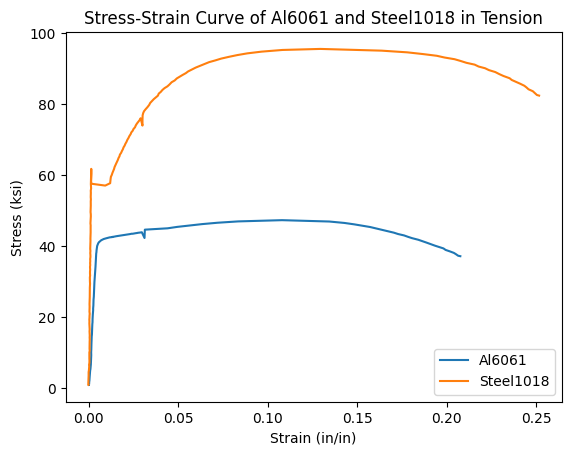

In [9]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')
ax.legend(['Al6061','Steel1018'])

plt.show()

### Caclulate elastic modulus

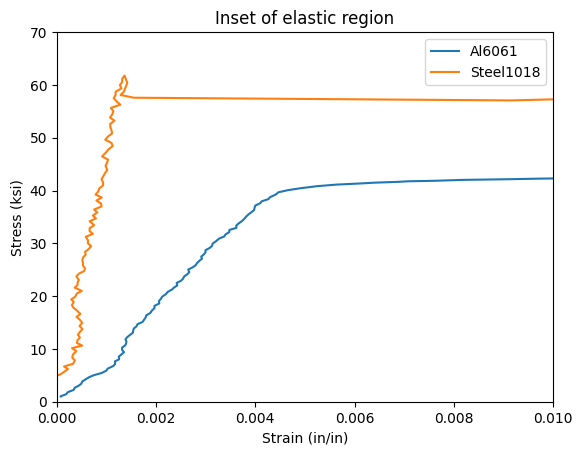

In [10]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_title('Inset of elastic region')
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.legend(['Al6061','Steel1018'])

ax.set_xlim([0,0.01])
ax.set_ylim([0,70])

plt.show()

In [11]:
# Find the elastic modulus of Al6061
# use stress and strain values from stress=0 to stress=35 ksi
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]

linear_regression_output = linregress(linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]

print(f'The elastic modulus of Al6061 is {round(E_al,1)} ksi')

The elastic modulus of Al6061 is 9909.4 ksi


In [12]:
# Find the elastic modulus of Steel1018
# use stress and strain values from stress=0 to stress=55 ksi
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]

linear_regression_output_steel = linregress(linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]

print(f'The elastic modulus of Steel1018 is {round(E_steel,1)} ksi')

The elastic modulus of Steel1018 is 40125.4 ksi


### Cacluate Yield Strength

The yield strength of a metal is calculated from a stress strain curve by drawing a line parallel to the elastic modulus that goes through the point strain=0.002. Where that line crosses the stress strain curve, that amount of stress is the yield strength

Point-Slope Formula for a line:

$$ y - y_1 = m(x-x_1) $$

Where $m=$ slope in the linear elastic region (elastic modulus, E), $x_1=0.002$, and $y_1 = 0$

Rewrite the equation, where $y=stress_{offset}$ and the elastic modulus and value of $x_1$ and $y_1$ are included.

$$ stress_{offset} = E(strain-0.002) $$

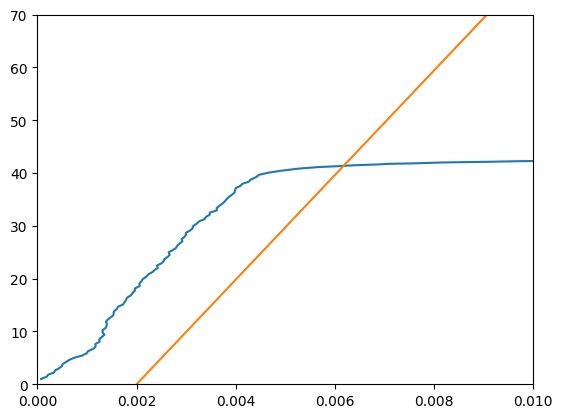

In [13]:
# calculate the yield strength of Al6061
stress_offset_al = E_al*(strain_al-0.002)

fig, ax = plt.subplots()

ax.plot(strain_al,stress_al,strain_al,stress_offset_al)
ax.set_ylim([0,70])
ax.set_xlim([0,0.01])

plt.show()

In [14]:
YS_al = 41.3653 # by zooming into the plot that contains the stress strain curve of Al6061 and the offset stress
print(f'The yield strength of Al6061 is {round(YS_al,1)} ksi')

The yield strength of Al6061 is 41.4 ksi


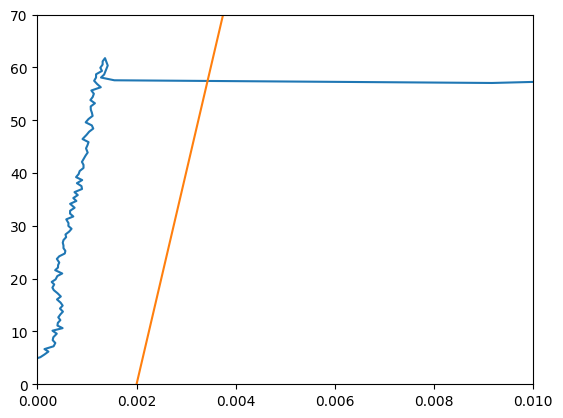

In [15]:
# Calculate the yield strength of Steel1018
stress_offset_steel = E_steel*(strain_steel-0.002)

fig, ax = plt.subplots()

ax.plot(strain_steel,stress_steel,strain_steel,stress_offset_steel)
ax.set_ylim([0,70])
ax.set_xlim([0,0.01])

plt.show()

In [16]:
YS_steel = 57.4495 # by zooming into a plot showing the stress strain curve of steel1018 and the offset stress
print(f'the yield strength of steel1018 is {round(YS_steel,1)} ksi')

the yield strength of steel1018 is 57.4 ksi


### Calculate yield strength programatically

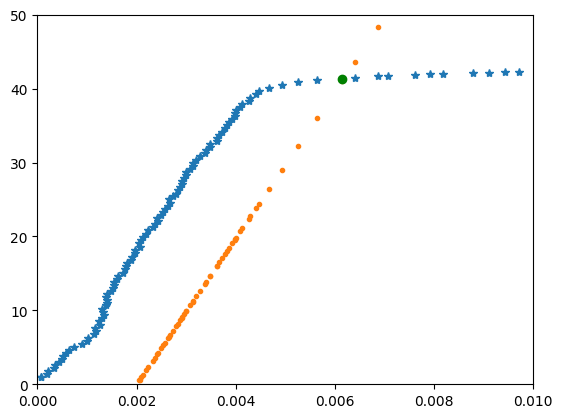

In [17]:
f = np.array(stress_al)
g = np.array(stress_offset_al)
yield_stress_index = np.argwhere(np.diff(np.sign(f - g)))[0][0]
yield_strength_al = stress_al[yield_stress_index]

fig, ax = plt.subplots()

ax.plot(strain_al,stress_al, "*")
ax.plot(strain_al, stress_offset_al, "." )
ax.plot(strain_al[yield_stress_index],yield_strength_al,'go')

ax.set_ylim([0,50])
ax.set_xlim([0,0.01])

plt.show()

In [18]:
print(f'The yield strength of Al6061 found programatically is {round(yield_strength_al,1)} ksi')

The yield strength of Al6061 found programatically is 41.3 ksi


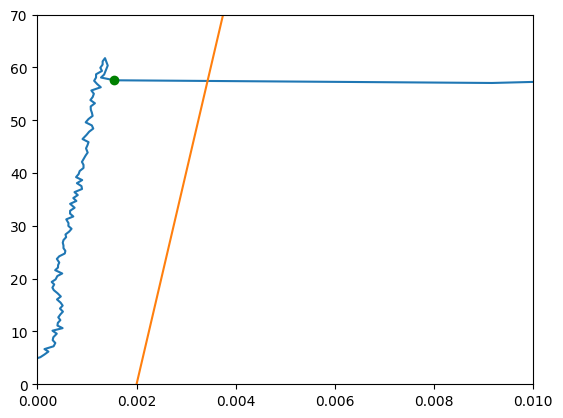

In [19]:
# Find the yield strength of steel programatically

f = np.array(stress_steel)
g = np.array(stress_offset_steel)

yield_strength_steel_index = np.argwhere(np.diff(np.sign(f - g)))[0][0]
yield_strength_steel = stress_steel[yield_strength_steel_index]

fig, ax = plt.subplots()

ax.plot(strain_steel,stress_steel)
ax.plot(strain_steel,stress_offset_steel)
ax.plot(strain_steel[yield_strength_steel_index],yield_strength_steel,'go')

ax.set_ylim([0,70])
ax.set_xlim([0,0.01])


plt.show()

In [20]:
print(f'The yield strength of Steel1018 found programatically is {round(yield_strength_steel,1)} ksi')

The yield strength of Steel1018 found programatically is 57.6 ksi


### Write a function to calculate the intersection of two lines

In [21]:
# write a function to calculate the intersection of two lines defined by 4 points

def intersection_point(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    d = (By2-By1)*(Ax2-Ax1)-(Bx2-Bx1)*(Ay2-Ay1)
    if d:
        uA = ((Bx2-Bx1)*(Ay1-By1)-(By2-By1)*(Ax1-Bx1))/d
        uB = ((Ax2-Ax1)*(Ay1-By1)-(Ay2-Ay1)*(Ax1-Bx1))/d
    else:
        return None
    if not(0 <= uA <= 1 and 0 <= uB <= 1):
        return None
    x = Ax1 + uA * (Ax2 - Ax1)
    y = Ay1 + uA * (Ay2 - Ay1)
    
    return x, y

In [22]:
strain_steel_array = np.array(strain_steel)
stress_steel_array = np.array(stress_steel)
strain_al_array = np.array(strain_al)
stress_al_array = np.array(stress_al)

### Caclulate yield strength using the intersection function

In [23]:
first = yield_strength_steel_index
second = first + 1
# A points from the stress strain curve
Ax1 = strain_steel_array[first]
Ay1 = stress_steel_array[first]
Ax2 = strain_steel_array[second]
Ay2 = stress_steel_array[second]
# B points from the offset line
Bx1 = strain_steel_array[first]
By1 = stress_offset_steel[first]
Bx2 = strain_steel_array[second]
By2 = stress_offset_steel[second]

# run our function that finds the intersection point
x, y = intersection_point(Ax1,Ay1,Ax2,Ay2,Bx1,By1,Bx2,By2)

print(x,y)

0.0034317318641272137 57.448780022628426


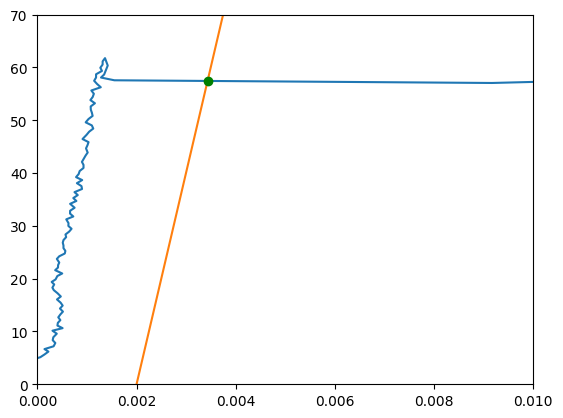

In [24]:
fig,ax = plt.subplots()


ax.plot(strain_steel_array,stress_steel_array)
ax.plot(strain_steel_array,stress_offset_steel)
ax.plot(x,y,'go')

ax.set_ylim([0,70])
ax.set_xlim([0,0.01])

plt.show()

In [25]:
print(f'The yield strength of Steel1018 calculated programmatically is {round(y,1)} ksi')

The yield strength of Steel1018 calculated programmatically is 57.4 ksi
